#**Import Library**

In [ ]:
pip install tensorflow

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from google.colab import drive
from shutil import copyfile
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#base_dir
base_dir = '/content/drive/Shareddrives/Capstone Project/ML/Dataset/Image'
#!ls
!ls "/content/drive/Shareddrives/Capstone Project/ML/Dataset/Image"

Materials  Train  Validation


In [ ]:
# menentukan directory
bahan_dir = os.path.join(base_dir, 'Materials')
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')

In [ ]:
# menentukan direktori isi bahan
cefadroxil_dir = os.path.join(bahan_dir, 'cefadroxil/')
fenofibrate_dir = os.path.join(bahan_dir, 'fenofibrate/')

print("jumlah data train tiap kelas")
print('Jumlah gambar obat cefadroxil :', len(os.listdir(cefadroxil_dir)))
print('Jumlah gambar obat fenofibrate :', len(os.listdir(fenofibrate_dir)))


jumlah data train tiap kelas
Jumlah gambar obat cefadroxil : 250
Jumlah gambar obat fenofibrate : 250


In [ ]:
#direktori isi latih
train_cefadroxil = os.path.join(train_dir, 'cefadroxil/')
train_fenofibrate = os.path.join(train_dir, 'fenofibrate/')

#direktori isi validasi
validation_cefadroxil = os.path.join(validation_dir, 'cefadroxil/')
validation_fenofibrate = os.path.join(validation_dir, 'fenofibrate/')

### **Menyiapkan dataset**


In [ ]:
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int (train_ratio * total_size)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in val_files:
    i_file = source + i
    destination = val + i
    copyfile(i_file, destination)

# pembagian data train dengan validation
train_ratio = 0.9

#pembagian train dan validasi
# training
source_00 = cefadroxil_dir
train_00 = train_cefadroxil
val_00 = validation_cefadroxil
train_val_split(source_00, train_00, val_00, train_ratio)

source_01 = fenofibrate_dir
train_01 = train_fenofibrate
val_01 = validation_fenofibrate
train_val_split(source_01, train_01, val_01, train_ratio)


In [ ]:
# misal untuk melihat jumlah pembagian
print('jumlah all bodrex    :', len(os.listdir(cefadroxil_dir)))
print('jumlah train cefadroxil  :', len(os.listdir(train_cefadroxil)))
print('jumlah val cefadroxil    :', len(os.listdir(validation_cefadroxil)))

jumlah all bodrex    : 250
jumlah train cefadroxil  : 225
jumlah val cefadroxil    : 25


#**Load & Preprocess Data**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range =0.1
)

val_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range =0.1
)

target

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

Found 450 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.90):
      print("\nAccuraty up to 90%")
      self.model.stop_training = True

callbacks = myCallback()

#**CNN Model**

In [ ]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3, seed=112),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5, seed=112),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 64)       

#**Compile The Model**

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

#optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
#model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=6,
    epochs=35,
    validation_data=val_generator,
    validation_steps=1,
    verbose=1,
    callbacks=[callbacks]
)

Epoch 1/35
6/6 [==============================] - 42s 7s/step - loss: 0.7242 - accuracy: 0.4333 - val_loss: 0.6831 - val_accuracy: 0.3000
Epoch 2/35
6/6 [==============================] - 37s 6s/step - loss: 0.5988 - accuracy: 0.4833 - val_loss: 0.4572 - val_accuracy: 0.8000
Epoch 3/35
6/6 [==============================] - 33s 6s/step - loss: 0.3767 - accuracy: 0.9000 - val_loss: 0.1562 - val_accuracy: 1.0000
Epoch 4/35
6/6 [==============================] - ETA: 0s - loss: 0.0618 - accuracy: 1.0000
Accuraty up to 90%
6/6 [==============================] - 40s 7s/step - loss: 0.0618 - accuracy: 1.0000 - val_loss: 2.6076e-04 - val_accuracy: 1.0000


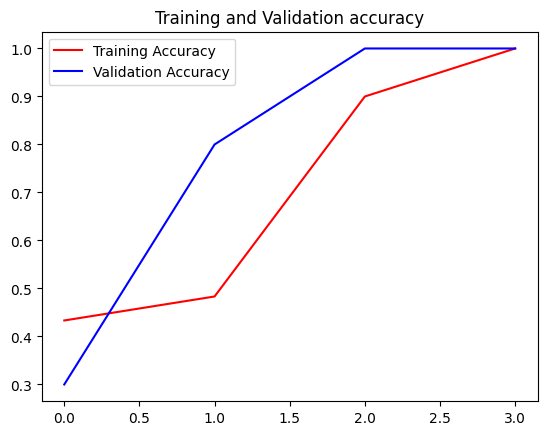

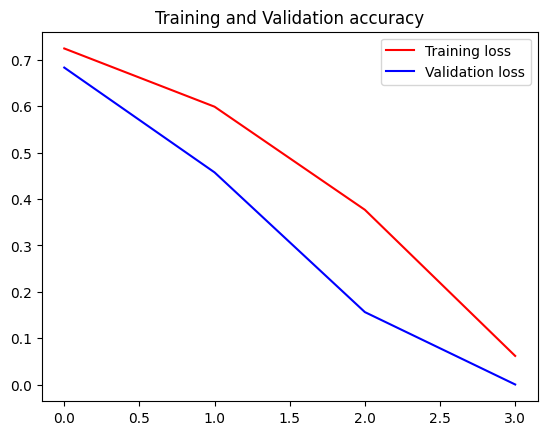

In [ ]:
#tingkat akurasi dan loss

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

#**Train The Model**

Saving IMG_20231215_100601_186.jpg to IMG_20231215_100601_186.jpg
1/1 [==============================] - 0s 239ms/step
IMG_20231215_100601_186.jpg
This image belongs to class cefadroxil


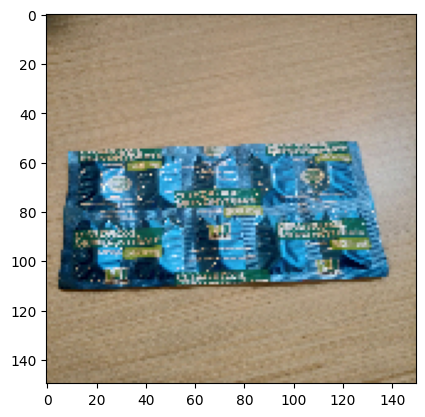

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=100)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1.:
      print('This image belongs to class', class_list[j])
      break


#**Evaluate The Model Using Data Testing**

In [ ]:
# Simpan model ke dalam file .h5
model.save('/content/drive/Shareddrives/Capstone Project/ML/Deteksi Gambar/model_01.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Simpan model ke dalam file .h5 di Google Drive
model.save('/content/drive/MyDrive/Capstone Project/ML/Deteksi Gambar/model_01.h5')


#**Make Predictions**

In [ ]:
import tensorflow as tf

# Load the Keras model from the .h5 file
model = tf.keras.models.load_model("/content/drive/MyDrive/Capstone Project/ML/Deteksi Gambar/model_01.h5")

# Convert the Keras model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open("model.tflite", "wb") as f:
    f.write(tflite_model)
